In [1]:
# `pip install -r requirements.txt` to install dependencies

import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.open_dataset("https://data.source.coop/aldenks/gfs-dynamical/analysis/v0.1.0.zarr", engine="zarr", chunks={})
ds

<xarray.Dataset> Size: 81GB
Dimensions:                  (latitude: 721, longitude: 1440, time: 4864)
Coordinates:
  * latitude                 (latitude) float64 6kB 90.0 89.75 ... -89.75 -90.0
  * longitude                (longitude) float64 12kB -180.0 -179.8 ... 179.8
  * time                     (time) datetime64[ns] 39kB 2021-01-01 ... 2024-0...
Data variables:
    precipitation_surface    (time, latitude, longitude) float32 20GB dask.array<chunksize=(40, 361, 360), meta=np.ndarray>
    temperature_surface      (time, latitude, longitude) float32 20GB dask.array<chunksize=(40, 361, 360), meta=np.ndarray>
    wind_u_10m_above_ground  (time, latitude, longitude) float32 20GB dask.array<chunksize=(40, 361, 360), meta=np.ndarray>
    wind_v_10m_above_ground  (time, latitude, longitude) float32 20GB dask.array<chunksize=(40, 361, 360), meta=np.ndarray>
Attributes:
    name:     NOAA GFS Analysis

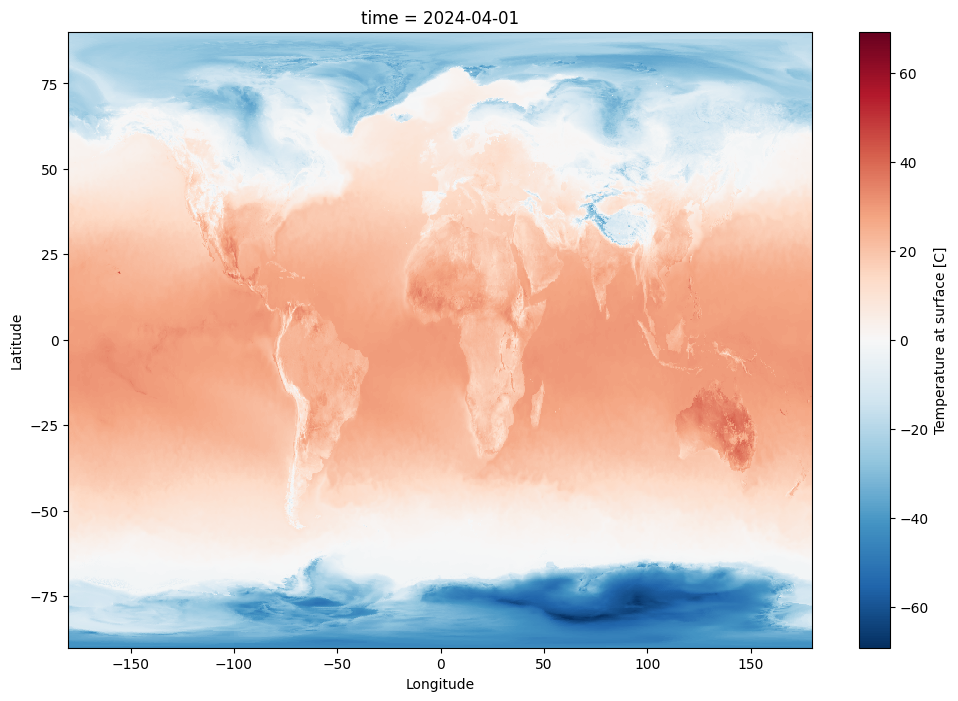

In [3]:
ds['temperature_surface'].sel(time='2024-04-01T00:00').plot(figsize=(12,8))

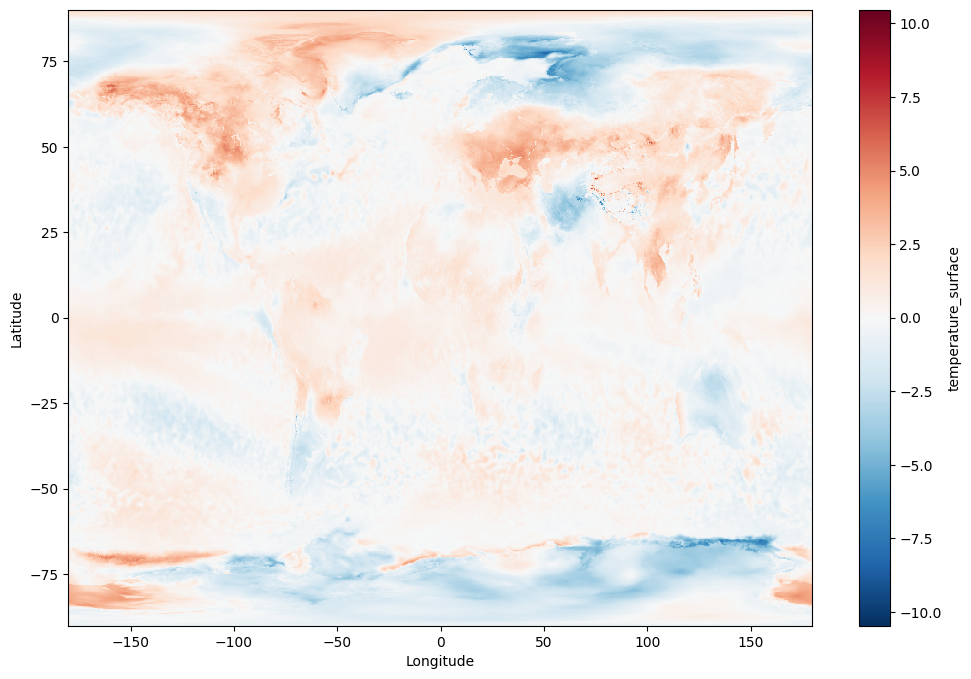

In [4]:
tmp_april_mean = ds['temperature_surface'].sel(time=ds.time.dt.month == 4).mean(dim='time')

tmp_april_2024 = ds['temperature_surface'].sel(time='2024-04').mean(dim='time')

# April 2024 temperature anomaly
(tmp_april_2024 - tmp_april_mean).plot(figsize=(12, 8))

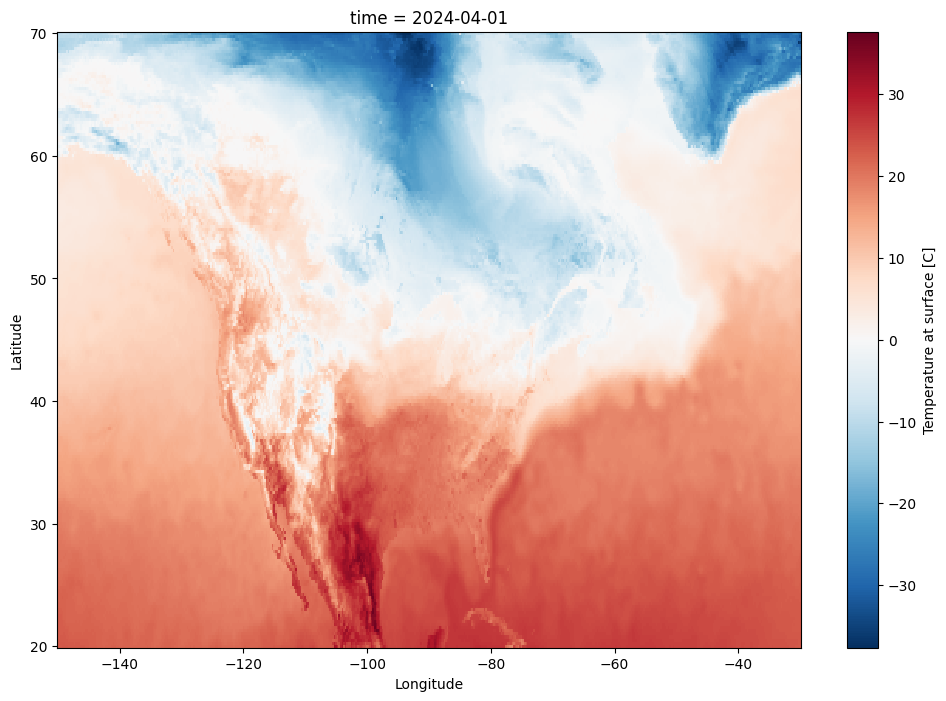

In [5]:
# Zoom in to a geographic region
(
    ds['temperature_surface'].sel(
        time='2024-04-01T00:00',
        latitude=slice(70, 20),
        longitude=slice(-150, -30)
    )
    .plot(figsize=(12, 8))
)

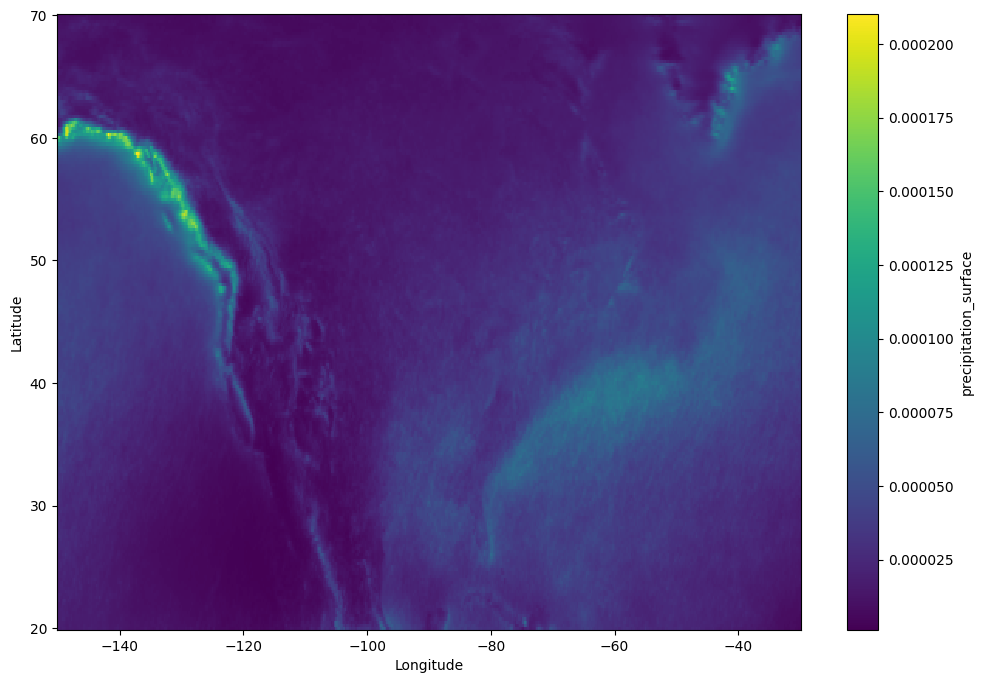

In [6]:
# What places get the most precipitation?
(
    ds['precipitation_surface'].sel(
        latitude=slice(70, 20),
        longitude=slice(-150, -30)
    )
    .mean(dim='time') # take the average over all time
    .plot(figsize=(12, 8))
)

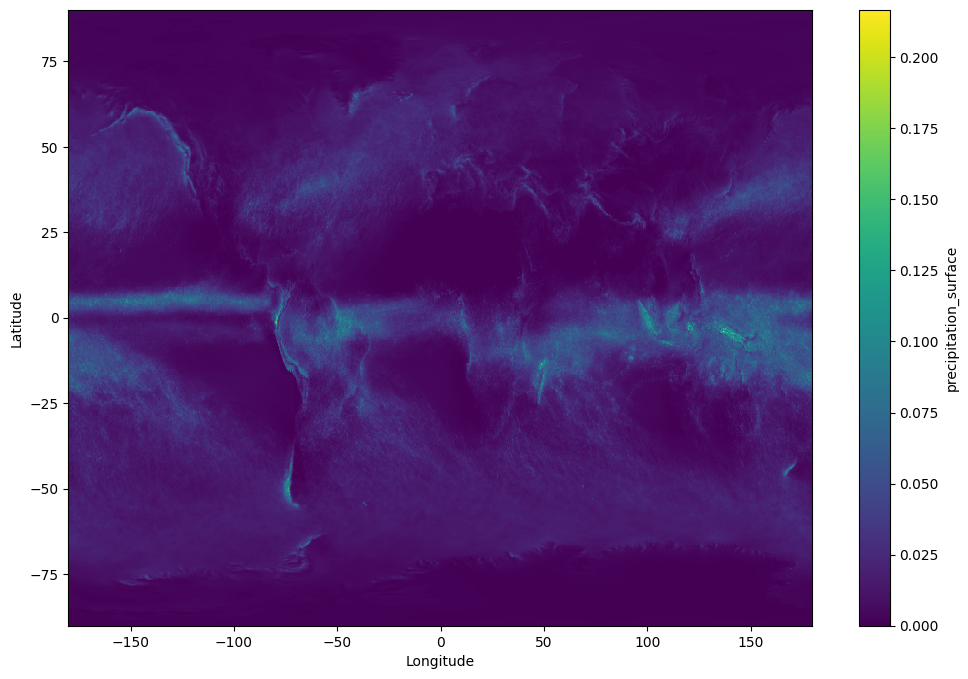

In [7]:
# Wettest places across the earth in the first 4 months of 2024
(
    ds['precipitation_surface'].sel(
        time=slice('2024-01-01', '2024-05-01'),
    )
    .sum(dim='time')
    .plot(figsize=(12, 8))
)

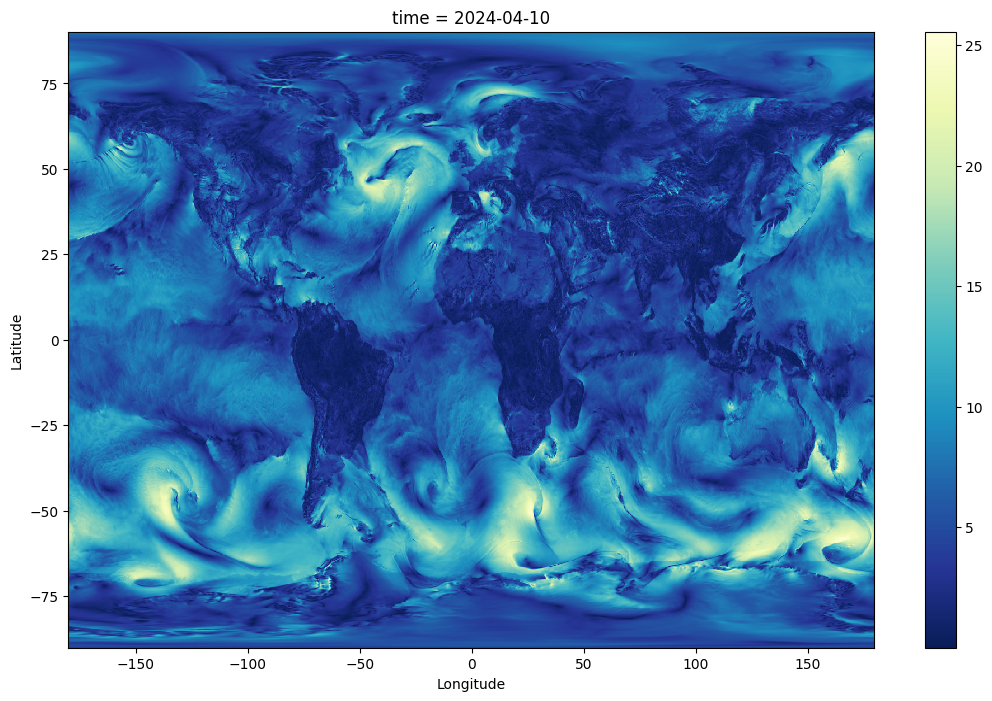

In [8]:
wind_speed = (ds['wind_u_10m_above_ground']**2 + ds['wind_v_10m_above_ground']**2) ** 0.5
wind_speed.sel(time='2024-04-10T00').plot(figsize=(13, 8), cmap='YlGnBu_r')

In [ ]:
wind_speed = (ds['wind_u_10m_above_ground']**2 + ds['wind_v_10m_above_ground']**2) ** 0.5
ws = wind_speed.sel(time=slice('2023-01-01T00', '2023-02-01T00'))
ws.load()
ws

In [ ]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

mpl.rcParams["animation.embed_limit"] = 100 # mb, so we can make large animations

def get_title(frame_da):
    return f"NOAA GFS Wind Speed {frame_da.time.dt.strftime('%Y-%m-%d').item()}"


fig, ax = plt.subplots(figsize=(1440/150 - 0.01, 721/150))

frame_0 = ws.isel(time=0)
img = ax.imshow(frame_0.values, cmap='YlGnBu_r')
title = ax.set_title(get_title(frame_0), y=.94, color='white')

ax.axis("off")
fig.subplots_adjust(0, 0, 1, 1)

def update_animation(frame_da):
    img.set_data(frame_da.values)
    title.set_text(get_title(frame_da))

anim = FuncAnimation(fig=fig, func=update_animation, frames=ws, interval=int(1000/15))
# HTML(anim.to_html5_video())  # requires local ffmpeg install
HTML(anim.to_jshtml())

In [ ]:
p = ds['precipitation_surface'].sel(time=slice('2023-01-01T00:00', '2023-02-01T00:00'))
p.load()

In [ ]:
import cmocean
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

mpl.rcParams["animation.embed_limit"] = 100 # mb, so we can make large animations

anim_da = p

def get_title(frame_da):
    return f"NOAA GFS Precipitation {frame_da.time.dt.strftime('%Y-%m-%d').item()}"


fig, ax = plt.subplots(figsize=(1440/150 - 0.01, 721/150))

frame_0 = anim_da.isel(time=0)
img = ax.imshow(frame_0.values, cmap=cmocean.cm.thermal, vmin=0, vmax=5e-4)
title = ax.set_title(get_title(frame_0), y=.94, color='white')

ax.axis("off")
fig.subplots_adjust(0, 0, 1, 1)

def update_animation(frame_da):
    img.set_data(frame_da.values)
    title.set_text(get_title(frame_da))

anim = FuncAnimation(fig=fig, func=update_animation, frames=anim_da, interval=int(1000/15))
HTML(anim.to_jshtml())

In [ ]:
t = ds['temperature_surface'].sel(time=slice('2023-01-01T00:00', '2023-02-01T00:00'))
t.load()

In [ ]:
import cmocean
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

mpl.rcParams["animation.embed_limit"] = 100 # mb, so we can make large animations

anim_da = t.sel(latitude=slice(72, 22), longitude=slice(-23, 161))

def get_title(frame_da):
    return f"NOAA GFS Temperature {frame_da.time.dt.strftime('%Y-%m-%d').item()}"


fig, ax = plt.subplots(figsize=(len(anim_da.longitude)/70 - 0.01, len(anim_da.latitude)/70))

frame_0 = anim_da.isel(time=0)
img = ax.imshow(frame_0.values, cmap=cmocean.cm.balance, vmin=-50, vmax=50)
title = ax.set_title(get_title(frame_0), y=.9, color='black')

ax.axis("off")
fig.subplots_adjust(0, 0, 1, 1)

def update_animation(frame_da):
    img.set_data(frame_da.values)
    title.set_text(get_title(frame_da))

anim = FuncAnimation(fig=fig, func=update_animation, frames=anim_da, interval=int(1000/10))
HTML(anim.to_jshtml())